In [1]:
import os
import cv2
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from PIL import Image
from numpy import asarray

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
model = Sequential()
model.add(Conv2D(64, 3, 3, input_shape = (224, 224, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(3, activation = 'sigmoid'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 74, 74, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 35, 35, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)             

In [20]:
train_datagen = ImageDataGenerator(
            rescale = 1./255,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True)

#generate testing set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CAPSTONE_PROJECT/dataset/training',
                target_size = (224, 224),
                batch_size = 32,
                class_mode = 'categorical')

testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CAPSTONE_PROJECT/dataset/testing',
                target_size = (224, 224),
                batch_size = 32,
                class_mode = 'categorical')

Found 300 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [22]:
model_train = model.fit_generator(training_set,
                        epochs = 100,
                        validation_data = testing_set)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
10/10 [==============================] - 110s 11s/step - loss: 1.1809 - accuracy: 0.2852 - val_loss: 1.0929 - val_accuracy: 0.5375
Epoch 2/100
10/10 [==============================] - 4s 424ms/step - loss: 1.0922 - accuracy: 0.4703 - val_loss: 1.0800 - val_accuracy: 0.3333
Epoch 3/100
10/10 [==============================] - 4s 421ms/step - loss: 1.0662 - accuracy: 0.4213 - val_loss: 0.9835 - val_accuracy: 0.5833
Epoch 4/100
10/10 [==============================] - 4s 423ms/step - loss: 0.9278 - accuracy: 0.6054 - val_loss: 0.9642 - val_accuracy: 0.5875
Epoch 5/100
10/10 [==============================] - 4s 423ms/step - loss: 0.9342 - accuracy: 0.5293 - val_loss: 0.9242 - val_accuracy: 0.5542
Epoch 6/100
10/10 [==============================] - 4s 419ms/step - loss: 0.8090 - accuracy: 0.6583 - val_loss: 0.8348 - val_accuracy: 0.6292
Epoch 7/100
10/10 [==============================] - 4s 419ms/step - loss: 0.7978 - accuracy: 0.6197 - val_loss: 0.8155 - val_accuracy: 0.6292

In [23]:
model.save("/content/drive/MyDrive/CAPSTONE_PROJECT/model_2.h5")

In [24]:
history = model_train
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


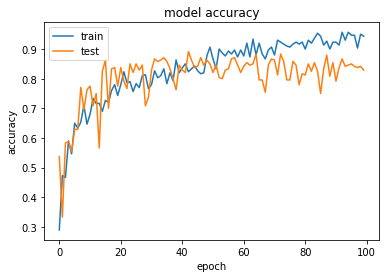

In [25]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

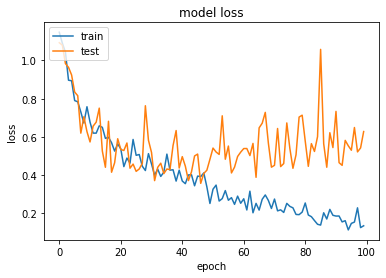

In [26]:
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
training_set.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [41]:
export_folder = '/content/drive/MyDrive/CAPSTONE_PROJECT/model/model_2'
tf.saved_model.save(model, export_folder)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CAPSTONE_PROJECT/model/model_2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CAPSTONE_PROJECT/model/model_2/assets


In [35]:
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [36]:
import tensorflow_datasets as tfds

In [37]:
# def generator():
#   data = tfds.load('/content/drive/MyDrive/CAPSTONE_PROJECT/dataset/')
#   for _ in range(num_calibration_steps):
#     image, = data.take(1)
#     yield [image]
image_shape = (224, 224, 3)

def representative_dataset_gen():
    for i in range(100):
        # creating fake images
        image = tf.random.normal([1] + list(image_shape))
        yield [image]

In [38]:
path = '/content/drive/MyDrive/CAPSTONE_PROJECT/model_2.h5'

In [39]:
# converter = tf.lite.TFLiteConverter.from_saved_model(export_folder)
model_2 = tf.keras.models.load_model(path)
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Set the optimzations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Pass the represntative dataset to the converter
converter.representative_dataset = representative_dataset_gen

# tf.lite.RepresentativeDataset(representative_dataset_gen)

# Restricting supported target op specification to INT8
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

# # Invoke the converter to finally generate the TFLite model
# tflite_model = converter.convert()

In [40]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpk_m53w14/assets


In [42]:
tflite_model_file = pathlib.Path('/content/drive/MyDrive/CAPSTONE_PROJECT/model_2.tflite')
tflite_model_file.write_bytes(tflite_model)

928320